# Non-Linear SVMs via Kernels

Kernels are responsable of one of main advatanges of SVMs: flexibility. With kernels you can compute many different decision functions using the same computational and mathematical machinery. The goal of this experience is to understand the role of kernels in the non-linear extension of SVMs.

## Tools

For this activity we will use sklearn, a very complete library for machine learning in Python.  


<img width='600px' align='left' src='figs/scikit.png'>




Please refer to http://scikit-learn.org/stable/ for help regarding installation and usage.

## Problem & Dataset

For this experiment we will use a toy non-linearly separable dataset, known as "too moons", that can be generated using the utility function

sklearn.datasets.make_moons

of the scikit-learn library. We can visualize the problem using a few python commands:

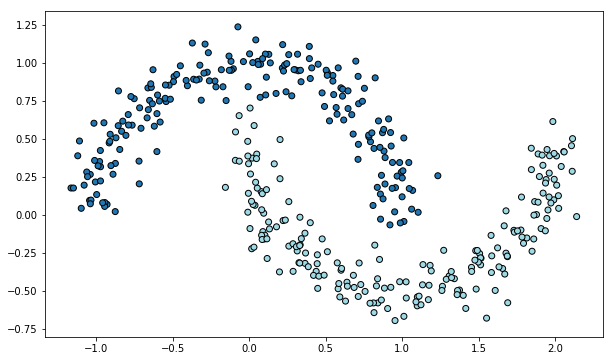

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

plt.figure(1, figsize=(10, 6))
plt.clf()
X,Y = make_moons(n_samples=400, noise=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.tab20, edgecolors='k')
plt.show()

## Model 

Recall that in order to build non-linear SVMs with kernels, we need to rely on the dual optimization problem:

\begin{align}
\underset{\alpha}{\mbox{max}} & \ W(\alpha) = \sum_{i=1}^n \alpha_\ell - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y^{(i)} y^{(j)} {k(x^{(i)},x^{(j)})}\\ \mbox{s.t.} &\  \sum\nolimits_i \alpha_i y^{(i)} = 0,  \ {0 \leq \alpha_i \leq C}, \ \forall i \notag \, .
\end{align}

The classifier (decision function for new cases) takes the form
\begin{align}
f(x) = \mbox{sign}\left(\sum_\ell \alpha_\ell k(x^{(\ell)},x)\right)
\end{align}

 
 


The points for which $\alpha_\ell \neq 0$ are called the support vectors. The size of this set determines the efficiency of the classifier in the test phase.

## Exercicies

### 1. Data Preparation & Baseline Model

Usually, an important step before applying a classifier to our dataset is to normalize the attributes in order to (i) get values into a standard range for the functions involved in the model, (ii) make the scales of different attributes comparable. For this experiment, you are asked to use a method of the scikit-learn library known as "Standard Scaler". It works by making the mean of each attribute equal to zero and their standar deviation equal to $1$.    

In order to assess the prediction error of the different models that we will build in this lab, you are also asked to prepare a set of test examples, extracting a random $25\%$ of the original set of training examples. 

Finally, to visualize the benefits of using kernels, train a linear SVM as the baseline and plot the corresponding decision boundary. Of course, you should observe an ordinary hyperplane. By now, fix the regularization parameter to some default value (typically $C=1$).  



Prediction Errror Linear SVM (C=1.000000) is 9.000000%


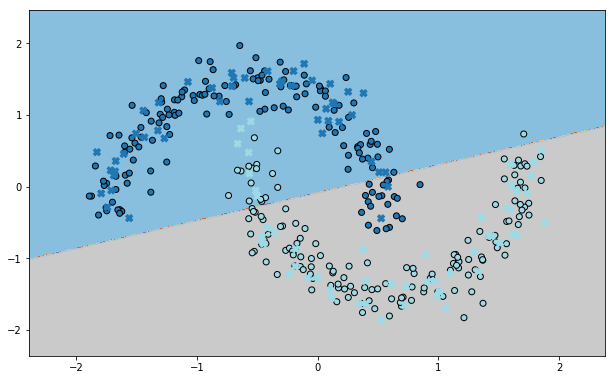

In [5]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

X,Y = make_moons(n_samples=400, noise=0.1, random_state=0)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
C_default = 1
clf = svm.SVC(kernel='linear', C=C_default)
clf.fit(X_train, Y_train)
prediction_error_linear = 1-clf.score(X_test, Y_test)
print("Prediction Errror Linear SVM (C=%f) is %f%%"%(C_default,100*prediction_error_linear))
base_line_prediction_error = prediction_error_linear

h=.01
X0, X1 = X[:, 0], X[:, 1]
x_min, x_max = X0.min() - .5, X0.max() + .5
y_min, y_max = X1.min() - .5, X1.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
f = plt.figure(1, figsize=(10, 6))
plt.clf()
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
out = ax.contourf(xx, yy, Z, cmap=plt.cm.tab20c, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, zorder=10, cmap=plt.cm.tab20, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, zorder=10, cmap=plt.cm.tab20, marker='X', s=50)
plt.show()

                      

### 2. Visualizing the Kernelized Boundaries

Now, try SVMs with different kernels and different values of their parameters. For some representative cases plot the corresponding boundary, compute the prediction error and mark using some special symbol, the examples which are support vectors in the final model.


Prediction Errror Kernel SVM (C=1.000000) is 2.000000% (improvement of 77.777778%)


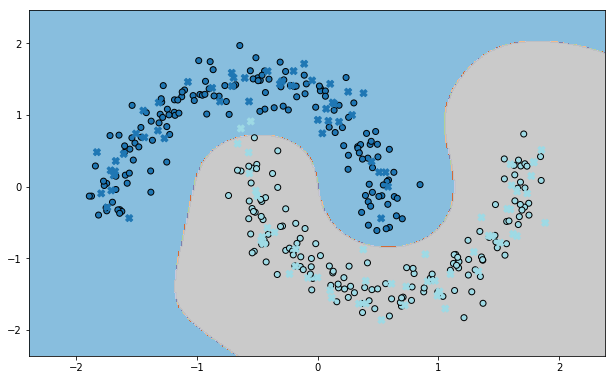

In [6]:
clf = svm.SVC(kernel='rbf', gamma=2, C=C_default)
#clf = svm.SVC(kernel='poly', degree=5, C=C_default)
#clf = svm.SVC(kernel='poly', degree=3, gamma=0.5, coef0=0.25, C=1)
#clf = svm.SVC(kernel='sigmoid', C=1, gamma=0.1, coef0=0.25)
clf.fit(X_train, Y_train)
prediction_error_nonlinear = 1-clf.score(X_test, Y_test)
improvement = (base_line_prediction_error - prediction_error_nonlinear)/base_line_prediction_error
print("Prediction Errror Kernel SVM (C=%f) is %f%% (improvement of %f%%)"%(C_default,100*prediction_error_nonlinear,100*improvement))


h=.01
X0, X1 = X[:, 0], X[:, 1]
x_min, x_max = X0.min() - .5, X0.max() + .5
y_min, y_max = X1.min() - .5, X1.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
f = plt.figure(1, figsize=(10, 6))
plt.clf()
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
out = ax.contourf(xx, yy, Z, cmap=plt.cm.tab20c, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, zorder=10, cmap=plt.cm.tab20, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, zorder=10, cmap=plt.cm.tab20, marker='X', s=50)
plt.show()

The simplest way to identify the support vectors them in the non-linear case, is to look at the corresponding coefficients in the dual representation of the decision function $f(x)=\mbox{sign}\left(\sum_\ell \alpha_\ell k(x^{(\ell)},x)\right)$. Are the support vectors the points closest to the decision boundary?


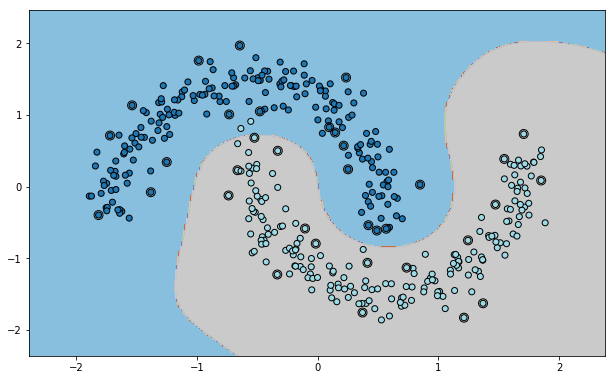

In [73]:
f = plt.figure(1, figsize=(10, 6))
plt.clf()

support_vectors = clf.support_vectors_ 
alpha = clf.dual_coef_

ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
plt.contourf(xx, yy, Z, cmap=plt.cm.tab20c, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.tab20, edgecolors='k')
plt.scatter(support_vectors[:,0],support_vectors[:,1], s=80, facecolors='none', zorder=10, edgecolor='k')
plt.show()

### Effect of the Value of $C$ in the Non-linear Case

We have previously shown that parameter $C$ allows to control the tradeoff between margin maximization and training error to obtain a model with better predictive performance. You are asked to confirm if this happens the same way in the non-linear case. In addition, you should observe an important phenomenon regarding the value of $C$ and the number of support vectors, that can have consequences on the efficiency of the trained classifier.

Prediction Errror Kernel SVM (C=10.000000) is 3.000000% (improvement of 66.666667%)
Training Errror Kernel SVM (C=10.000000) is 2.187500%
Number of Support Vectors is 97 (32.333333% of the dataset)


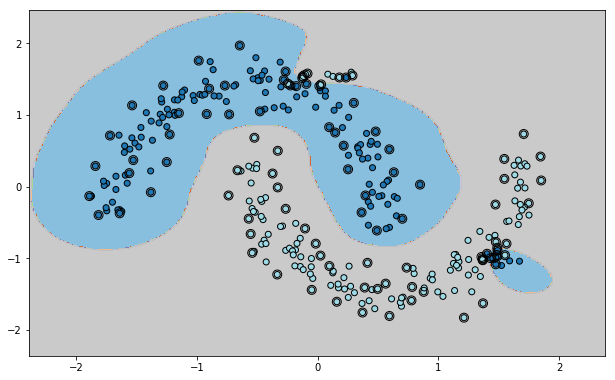

In [12]:
C_value=10

clf = svm.SVC(kernel='rbf', gamma=10, C=C_value)
n_spu = 10
X_spu = np.r_[0.1*np.random.randn(n_spu, 2) + [0, 1.5], 0.1*np.random.randn(n_spu, 2) + [1.5, -1]]
Y_spu = [1] * n_spu + [0] * n_spu 
X_new = np.r_[X_train,X_spu]
Y_new = np.r_[Y_train,Y_spu]

clf.fit(X_new, Y_new)
prediction_error_nonlinear = 1-clf.score(X_test, Y_test)
train_error_non_linear = 1-clf.score(X_new, Y_new)
improvement = (base_line_prediction_error - prediction_error_nonlinear)/base_line_prediction_error
support_vectors = clf.support_vectors_ 
alpha = clf.dual_coef_
n_support = len(support_vectors)
fraction_support = float(n_support)/float(len(X_train))
print("Prediction Errror Kernel SVM (C=%f) is %f%% (improvement of %f%%)"%(C_value,100*prediction_error_nonlinear,100*improvement))
print("Training Errror Kernel SVM (C=%f) is %f%%"%(C_value,100*train_error_non_linear))
print("Number of Support Vectors is %d (%f%% of the dataset)"%(n_support,100*fraction_support))

f = plt.figure(1, figsize=(10, 6))
plt.clf()
Z_new = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_new = Z_new.reshape(xx.shape)
ax = f.add_axes([0.1, 0.1, 0.8, 0.8])
plt.contourf(xx, yy, Z_new, cmap=plt.cm.tab20c, alpha=0.8)
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y_new, zorder=10, cmap=plt.cm.tab20, edgecolors='k')
plt.scatter(support_vectors[:,0],support_vectors[:,1], s=80, facecolors='none', zorder=10, edgecolor='k')
plt.show()

### 3. Simplest Model Selection Strategy

Ok, now you have a lot of candidate models and need to choose among them. This problem is known as _model_ _selection_. As we have discussed, selecting a model based on the test error is methodologically incorrect, since proceeeding in this way, the observed test error is longer a unbiased estimator of the real prediction error (_model_ _assessment_). We can however reserve a subset of the training set to perform model selection. This is called the _validation_ _set_.

You are asked to determine if a validation set allows you to select the model with a lowest prediction error. Does it depend on the fraction of data used for validation?


In [174]:
models = (svm.SVC(kernel='linear', C=1),
          svm.SVC(kernel='rbf', C=1),
          svm.SVC(kernel='rbf', gamma=10, C=1),
          svm.SVC(kernel='sigmoid', C=1, gamma=0.1, coef0=0.25),
          svm.SVC(kernel='poly', degree=3, gamma=0.5, coef0=0.25, C=1))

X_train_s, X_val, Y_train_s, Y_val = train_test_split(X_train, Y_train, test_size=0.5)

for idx,model in enumerate(models):
    model.fit(X_train_s,Y_train_s)
    tr_error = 1-model.score(X_train_s,Y_train_s)
    val_error = 1-model.score(X_val,Y_val)
    ts_error = 1-model.score(X_test,Y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))

Model:0, Train Error:0.140000, Val Error:0.113333, Test Error:0.090000
Model:1, Train Error:0.013333, Val Error:0.006667, Test Error:0.030000
Model:2, Train Error:0.000000, Val Error:0.000000, Test Error:0.010000
Model:3, Train Error:0.146667, Val Error:0.126667, Test Error:0.110000
Model:4, Train Error:0.046667, Val Error:0.026667, Test Error:0.050000


### 4. Grid Search & Cross-validation

As we have discussed, a method to overcome the limitations of using a validation set is cross-validation. This comes at expenses of more computation, signficantly more computation, but usually improvememts in terms of prediction error pay the inconvinience.  

In this section, you are asked to use cross-validation to choose a kernel and syntonize its parameters. You will use a technique known as _grid_ _search_. It essentially means that you prepare a list of candidate values of each parameter and explore exhaustively, all the possible combinations.

To visualize the obtained results you are asked to report a heatmap representing the predictive accuracy of the different parameter configurations.


For simplicity, we can work with the RBF and the polynomial cases, separately.

The best parameters for RBF are {'C': 0.125, 'gamma': 10.0} with a score of 1.00


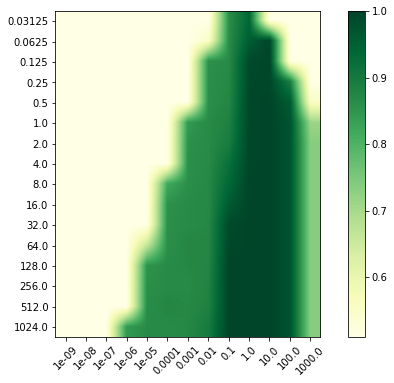

In [13]:
from sklearn.model_selection import GridSearchCV
import matplotlib.colors as colors

C_range = np.logspace(-5, 10, 16, base=2)
gamma_range = np.logspace(-9, 3, 13, base=10)

param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=10)
grid.fit(X_train, Y_train)

print("The best parameters for RBF are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))

f, ax = plt.subplots(1, 1, figsize=(10,6))
plt.imshow(scores, interpolation='bilinear', cmap=plt.cm.YlGn, vmin=np.percentile(scores,10), vmax=np.percentile(scores,90))
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.colorbar()
plt.show()


6
The best parameters for POLY are {'C': 0.25, 'coef0': 1.0, 'degree': 5} with a score of 1.00


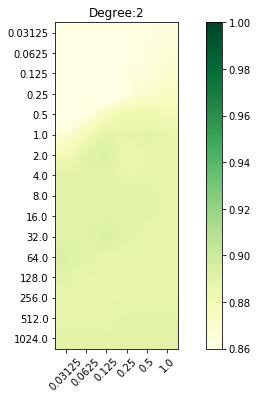

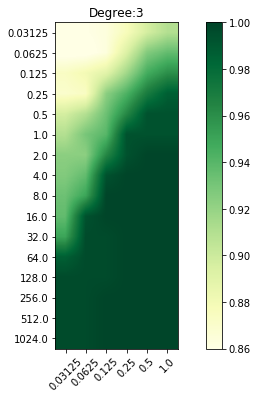

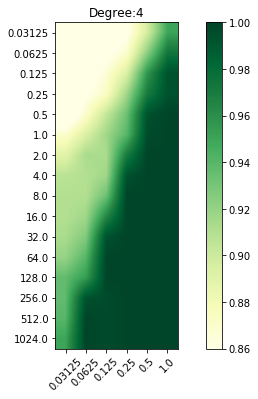

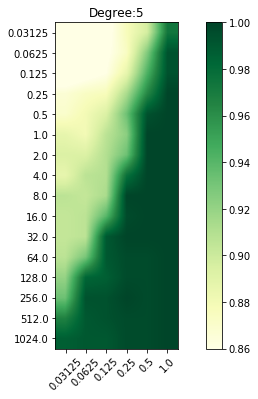

In [189]:
degree_range = np.array([2,3,4,5])
C_range = np.logspace(-5, 10, 16, base=2)
coef_range = np.logspace(-5, 0, 6, base=2)
print(len(coef_range))
param_grid = dict(degree=degree_range,coef0=coef_range,C=C_range)
grid = GridSearchCV(svm.SVC(kernel='poly'), param_grid=param_grid, cv=10)
grid.fit(X_train, Y_train)

print("The best parameters for POLY are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(coef_range),len(degree_range))

for idx in range(len(degree_range)):
    f, ax = plt.subplots(1, 1, figsize=(10,6))
    plt.clf()
    plt.imshow(scores[:,:,idx], interpolation='bilinear', cmap=plt.cm.YlGn, vmin=np.percentile(scores,10), vmax=np.percentile(scores,90))
    plt.xticks(np.arange(len(coef_range)), coef_range, rotation=45)
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.colorbar()
    plt.title("Degree:%d"%degree_range[idx])
    plt.show()

### 5. Understanding Kernels using KPCA

A way to get insights in the way by which kernels modify the geometry of the space to learn classify the data is looking at the principal components of the transformed dataset, i.e., the directions of greater variance in the feature space induced by the kernel. This is possible thanks to a techniques known as Kernel PCA (KPCA).

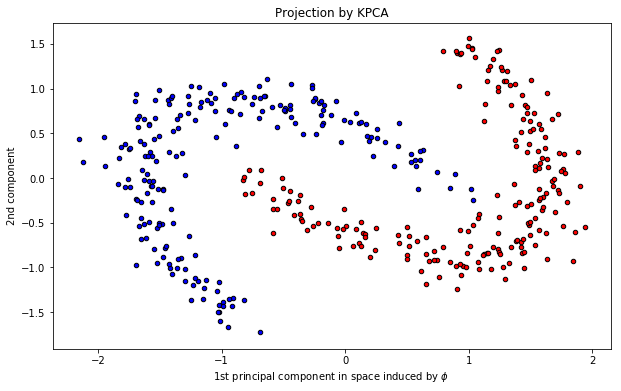

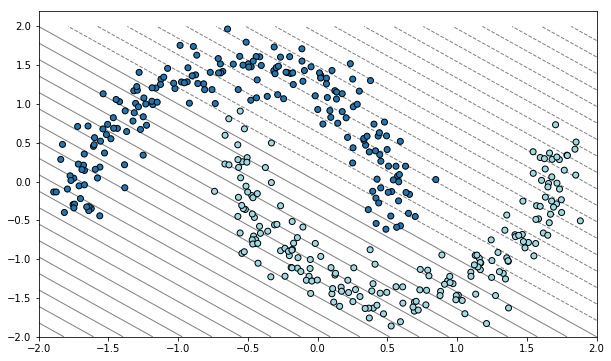

In [92]:
from sklearn.decomposition import PCA, KernelPCA
#clf = svm.SVC(kernel='rbf', gamma=10, C=0.125)
#clf = svm.SVC(kernel='poly', degree=5, coef0=1.0, C=0.25)

kpca = KernelPCA(kernel="linear")
#kpca = KernelPCA(kernel="poly", degree=5, coef0=1.0, fit_inverse_transform=False)
X_kpca = kpca.fit_transform(X)
reds = Y == 0
blues = Y == 1

f, ax = plt.subplots(1, 1, figsize=(10,6))
plt.clf()
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")
plt.show()

component_to_plot = 1
f, ax = plt.subplots(1, 1, figsize=(10,6))
plt.clf()
X1, X2 = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-2, 2, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:,component_to_plot].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, 50, colors='grey', linewidths=1, origin='lower')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.tab20, edgecolors='k')


plt.show()



### 6. Kernels as Feature Generators

Another way to understand kernels is regarding them as methods to synthetize new features that make the problem more easy to solve. To demonstrate that this is actually the case, you are asked to use a technique known as the Nystrom method, that approximates the features corresponding to a given kernel. The idea is showing that by using more and more synthetic features you actually reproduce the predictive performance of a kernelized SVM.


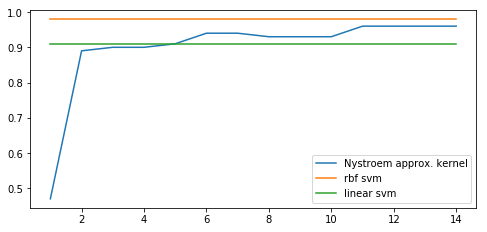

In [44]:
from sklearn import pipeline
from sklearn.kernel_approximation import RBFSampler, Nystroem

feature_map_nystroem = Nystroem(gamma=.2, random_state=1)
nystroem_approx_svm = pipeline.Pipeline([("feature_map", feature_map_nystroem),("svm", svm.LinearSVC())])
kernel_svm = svm.SVC(kernel='rbf',gamma=10,C=0.125)
linear_svm = svm.SVC(kernel='linear')

kernel_svm.fit(X_train, Y_train)
kernel_svm_score = kernel_svm.score(X_test, Y_test)
linear_svm.fit(X_train, Y_train)
linear_svm_score = linear_svm.score(X_test, Y_test)

sample_sizes = np.arange(1, 15)

nystroem_scores = []


for D in sample_sizes:
    nystroem_approx_svm.set_params(feature_map__n_components=D)
    nystroem_approx_svm.fit(X_train, Y_train)
    nystroem_score = nystroem_approx_svm.score(X_test, Y_test)
    nystroem_scores.append(nystroem_score)


plt.figure(figsize=(8, 8))
accuracy = plt.subplot(211)

accuracy.plot(sample_sizes, nystroem_scores, label="Nystroem approx. kernel")
accuracy.plot([sample_sizes[0], sample_sizes[-1]],[kernel_svm_score, kernel_svm_score], label="rbf svm")
accuracy.plot([sample_sizes[0], sample_sizes[-1]],[linear_svm_score, linear_svm_score], label="linear svm")
accuracy.legend(loc='best')
plt.show()


## Conclusions of the Experience

1. Kernels allow to change the geometry of the space where data is represented to solve a machine learning problem, giving to SVMs a great flexibility to represent different types of non-linear decision boundaries.

2. Kernels works by synthetizing new features that allow to solve the classification problem more accurately.

3. In the case of kernelized SVMs, the support vectors are no longer the closest points to the decision boundary in the original space but in the new feature space. A more simpler way to think about them is by recalling that these are the points actively participating in the classification of novel points.

4. To select a kernel and its parameters we need to rely on a model selection technique. The simplest one consists in reserving a validation set. A more robust but computationally more intensive method is K-fold cross-validation. Both techniques are usually employed with a grid exhavustive search in the hyper-parameter space. 

